In [1]:
#import panda packages
import pandas as pd

#Read Data from CSV file And Store It IN DATAFRAME
df = pd.read_csv('AMZN.csv')

#print TOP 10 RECORD
df.head(10)
df.shape

(6210, 7)

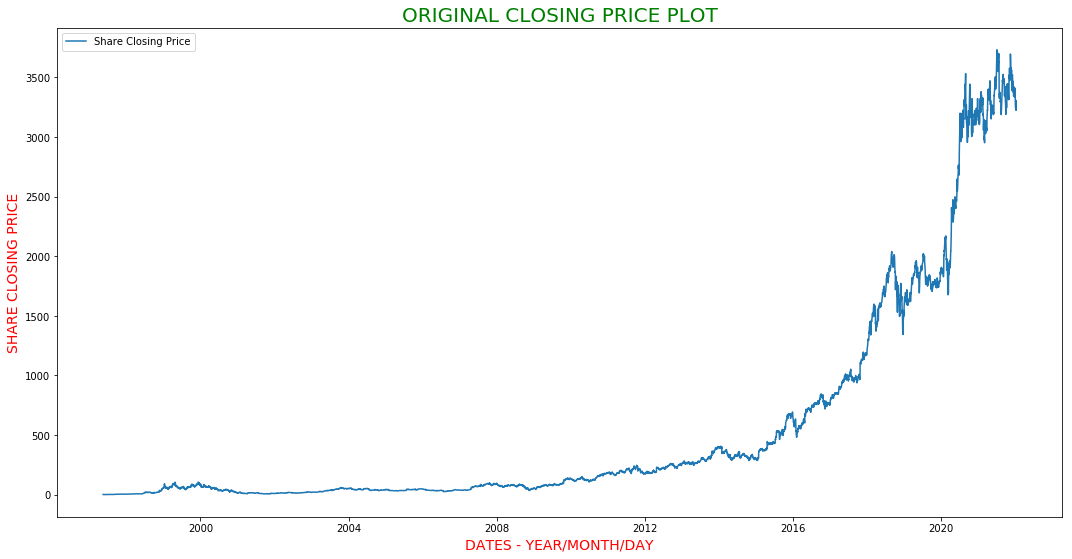

In [3]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#to plot the graph
import matplotlib.pyplot as plt
%matplotlib inline

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(18,9))

ax.plot(df['Close'], label='Share Closing Price')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('ORIGINAL CLOSING PRICE PLOT', fontsize=20, color='g')
ax.legend()

In [4]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
train_data_2 = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     train_data_2['Date'][i] = data['Date'][i]
     train_data_2['Close'][i] = data['Close'][i]

train_data_2.to_csv('AMZN_MovingAvgData.csv')
train_data_2.head(10)

,Date,Close
0,1997-05-15 00:00:00,1.95833
1,1997-05-16 00:00:00,1.72917
2,1997-05-19 00:00:00,1.70833
3,1997-05-20 00:00:00,1.63542
4,1997-05-21 00:00:00,1.42708
5,1997-05-22 00:00:00,1.39583
6,1997-05-23 00:00:00,1.5
7,1997-05-27 00:00:00,1.58333
8,1997-05-28 00:00:00,1.53125
9,1997-05-29 00:00:00,1.50521


In [5]:
# 1 month prediction
#splitting into train and test
train = train_data_2[:6160]
test = train_data_2[6160:]

train.to_csv('AMZN_train_MovingAvgTrainData.csv')
test.to_csv('AMZN_test_MovingAvgValidData.csv')

In [6]:
# Shape Return No of ROWS AND COLUMN OF A DATAFRAME
train_data_2.shape, train.shape, test.shape

((6210, 2), (6160, 2), (50, 2))

In [7]:
# TO Check the First and Last Record Value
train['Date'].min(), train['Date'].max(), test['Date'].min(), test['Date'].max()

(Timestamp('1997-05-15 00:00:00'),
 Timestamp('2021-11-03 00:00:00'),
 Timestamp('2021-11-04 00:00:00'),
 Timestamp('2022-01-14 00:00:00'))

In [62]:
#make predictions
stockclose_preds = []

# range value taken from test.shape
test_shape_no_of_records = 50
no_of_record = 100

for i in range(0,test_shape_no_of_records):
    if i < no_of_record:
        a = train['Close'][len(train)-no_of_record+i:].sum() + sum(stockclose_preds)
    else:
        c = stockclose_preds[-no_of_record:]
        a = sum(c)
    
    b = a/no_of_record
    stockclose_preds.append(b)

In [63]:
date_list = []

date_list = list(test.Date) # TAKE DATE FROM TEST DATA FRAME AND CONVERT IT TO LIST
#print (stcokclose_preds)
#print (date_list)
 
dict = {'Date':date_list,'Predict_Close': stockclose_preds} # CREATE DICTIONARY USING LIST
#print(dict)

predict_df = pd.DataFrame(dict)  #CONVERT DICTIONARY TO DATAFRAME
predict_df.to_csv('AMZN_MovingAvgPredictData.csv')

In [64]:
#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

import numpy as np

x = np.power((np.array(test['Close'])-stockclose_preds),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
rmse

104.75388936289444

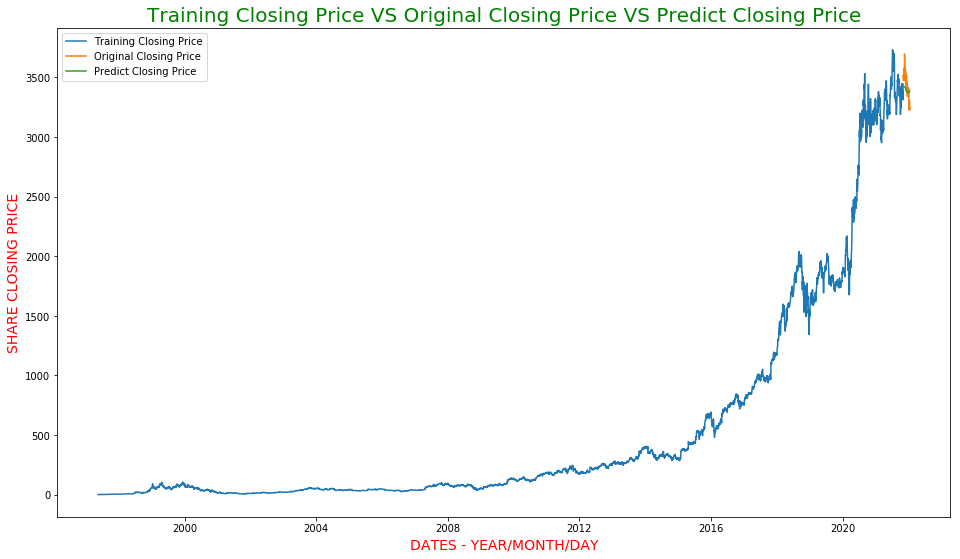

In [65]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(train['Date'],train['Close'],label = 'Training Closing Price')
ax.plot(test['Date'],test['Close'],label = 'Original Closing Price')
ax.plot(predict_df['Date'],predict_df['Predict_Close'],label = 'Predict Closing Price')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Training Closing Price VS Original Closing Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()

In [66]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_Predicted))*100
    return mape

print(MAPE(test['Close'],stockclose_preds))

2.47607129588857
